In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [10]:
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [11]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [5]:
print(x_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


In [12]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

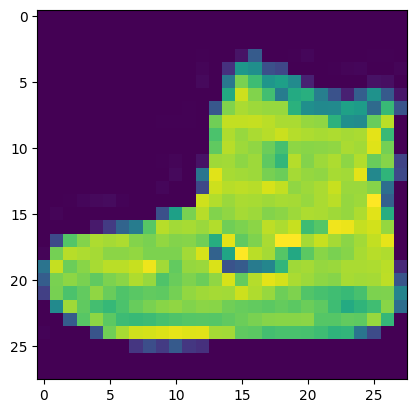

In [13]:
plt.imshow(x_train[0])

In [14]:
print(y_train[0])

9


In [15]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [16]:
x_train = x_train.astype(float) / 255.0
x_test = x_test.astype(float) / 255.0

In [17]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [18]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPooling2D, Flatten, Dense

In [21]:
model = Sequential()
model.add(InputLayer(shape=(28, 28, 1)))
model.add(Conv2D(filters=10, kernel_size=3, strides=(1, 1), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=10, kernel_size=3, strides=(1, 1), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=10, kernel_size=3, strides=(1, 1), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

In [22]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 10)          │             100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 13, 13, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 11, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 5, 5, 10)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 3, 3, 10)            │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 1, 1, 10)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,034 (19.66 KB)

 Trainable params: 5,034 (19.66 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
import tensorflow
model.compile(optimizer='adam', loss=tensorflow.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [24]:
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [25]:
history = model.fit(x_train, y_train, epochs=30, batch_size=512, validation_data=(x_test, y_test))

Epoch 1/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 24s 183ms/step - accuracy: 0.2801 - loss: 2.0491 - val_accuracy: 0.6600 - val_loss: 0.9420
Epoch 2/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 39s 172ms/step - accuracy: 0.6881 - loss: 0.8581 - val_accuracy: 0.7240 - val_loss: 0.7693
Epoch 3/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 19s 165ms/step - accuracy: 0.7305 - loss: 0.7365 - val_accuracy: 0.7407 - val_loss: 0.7197
Epoch 4/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 26s 212ms/step - accuracy: 0.7572 - loss: 0.6738 - val_accuracy: 0.7511 - val_loss: 0.6914
Epoch 5/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 19s 159ms/step - accuracy: 0.7636 - loss: 0.6501 - val_accuracy: 0.7640 - val_loss: 0.6581
Epoch 6/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 21s 165ms/step - accuracy: 0.7701 - loss: 0.6279 - val_accuracy: 0.7714 - val_loss: 0.6361
Epoch 7/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 21s 170ms/step - accuracy: 0.7793 - loss: 0.6018 - val_accuracy: 0.7764 - val_loss: 0.6212
Epoch 8/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 20s 164ms/step - accuracy: 0.7829 - loss: 0

In [26]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

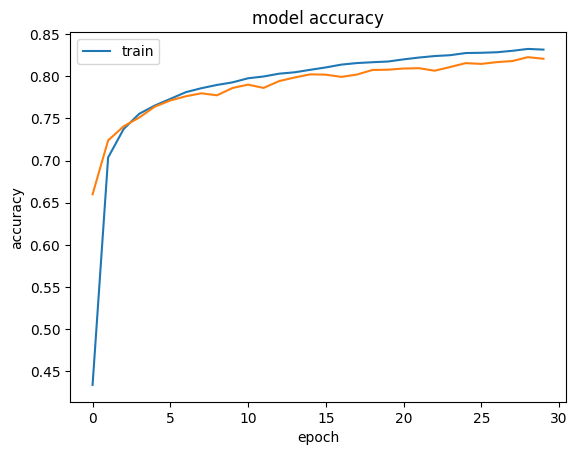

In [27]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()